In [1]:
import os
import tempfile
import scanpy as sc
import seaborn as sns
import anndata as ad
import pandas as pd
import warnings 
from scipy.stats import median_abs_deviation
import numpy as np

warnings.simplefilter(action='ignore', category=Warning)


In [2]:
adata_filt_files = {}
adata_raw_files = {}

In [3]:
sample = "TREG067_ASTRL"
filt_file = os.path.join(
    "10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04428",
    "data/CCG1155a-sc-pilot/cellranger_out/count_CCG1155_TREG067_ASTRL_A1_SC_5GEX_L_175309/outs/filtered_feature_bc_matrix")
raw_file = os.path.join(
    "10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04428/"
    "data/CCG1155a-sc-pilot/cellranger_out/count_CCG1155_TREG067_ASTRL_A1_SC_5GEX_L_175309/outs/raw_feature_bc_matrix")
adata_filt_files[sample] = filt_file
adata_raw_files[sample] = raw_file

In [4]:
sample = "TREG067_PBMC"
filt_file = os.path.join(
    "10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04428",
    "data/CCG1155a-sc-pilot/cellranger_out/count_CCG1155_TREG067_PBMC_A1_SC_5GEX_L_175310/outs/filtered_feature_bc_matrix")
raw_file = os.path.join(
    "10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04428/"
    "data/CCG1155a-sc-pilot/cellranger_out/count_CCG1155_TREG067_PBMC_A1_SC_5GEX_L_175310/outs/raw_feature_bc_matrix")
adata_filt_files[sample] = filt_file
adata_raw_files[sample] = raw_file

In [5]:
for i in ["02", "72", "49", "68"]:
    for t in ["_ASTRL", "_PBMC"]:
        sample = "TREG0" + i + t
        rt_dir = "10XGenomicsRNASeq/chandraker_scRNASeq_human_PBMC_kidney_transplant_hbc04749/data/from_sequencing_facility/cellranger_out/"
        fsm = "count_" + sample + "/outs/per_sample_outs/count_" + sample + "/count/sample_filtered_feature_bc_matrix"
        rsm = "count_" + sample + "/outs/multi/count/raw_feature_bc_matrix"
        filt_file = os.path.join(rt_dir, fsm)
        raw_file = os.path.join(rt_dir, rsm)
        adata_filt_files[sample] = filt_file
        adata_raw_files[sample] = raw_file

In [6]:
for sample_name, h5_file in adata_raw_files.items():
    adata_raw_files[sample_name] = os.path.abspath(h5_file)

In [7]:
for sample_name, h5_file in adata_filt_files.items():
    adata_filt_files[sample_name] = os.path.abspath(h5_file)

In [8]:
processed = sc.read("RData/4_chandraker_seurat_complete-dataset_clustered_res0-4_O2.h5ad")

In [9]:
import logging

import anndata2ri
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
#ro.pandas2ri.activate()
#anndata2ri.activate()

%load_ext rpy2.ipython

In [10]:
%load_ext rpy2.ipython
anndata2ri.set_ipython_converter()

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [11]:
%%R
library(SoupX)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In [119]:
t = adata.obs.merge(processed.obs, left_index=True,
                    right_index=True, suffixes=["", "_prev"])
t.shape

(29930, 64)

In [120]:
adata.obs = t

In [124]:
processed

AnnData object with n_obs × n_vars = 29930 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Log10GenesPerUMI', 'mitoRatio', 'riboRatio', 'barcode', 'patient_id', 'condition', 'TCR_clones', 'TCR_proportion', 'TCR_CDR3nt', 'TCR_CDR3aa', 'TCR_v_gene', 'TCR_d_gene', 'TCR_j_gene', 'TCR_chain', 'TCR_cellranger_clonotype_id', 'TCR_clonotype_id', 'BCR_clones', 'BCR_proportion', 'BCR_CDR3nt', 'BCR_CDR3aa', 'BCR_v_gene', 'BCR_d_gene', 'BCR_j_gene', 'BCR_chain', 'BCR_cellranger_clonotype_id', 'BCR_clonotype_id', 'repseq', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.score', 'predicted.celltype.l2', 'predicted.celltype.l3.score', 'predicted.celltype.l3', 'mapping.score', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.6', 'SCT_snn_res.0.8', 'seurat_clusters', 'study_clusters', 'cluster_name'
    var: 'names'
    obsm: 'X_harmony', 'X_integrated_dr', 'X_pca', 'X_ref.umap', 'X_umap'
    layers: 'counts_RNA'

In [126]:
list(adata.obsm.keys())

[]

In [132]:
adata.obs_names

Index(['TREG002_ASTRL_AAACCTGAGAGTGACC-1', 'TREG002_ASTRL_AAACCTGTCGCCTGAG-1',
       'TREG002_ASTRL_AAACGGGAGATCGGGT-1', 'TREG002_ASTRL_AAACGGGCATCTGGTA-1',
       'TREG002_ASTRL_AAACGGGGTCGAACAG-1', 'TREG002_ASTRL_AAACGGGTCGTGGTCG-1',
       'TREG002_ASTRL_AAAGATGGTACAGCAG-1', 'TREG002_ASTRL_AAAGCAACACTAGTAC-1',
       'TREG002_ASTRL_AAAGCAATCCGGGTGT-1', 'TREG002_ASTRL_AAAGTAGCACTGTCGG-1',
       ...
       'TREG072_PBMC_TTTGGTTAGTTTGCGT-1', 'TREG072_PBMC_TTTGGTTGTATAGGTA-1',
       'TREG072_PBMC_TTTGGTTGTCTTCAAG-1', 'TREG072_PBMC_TTTGGTTTCAAACAAG-1',
       'TREG072_PBMC_TTTGGTTTCTTCGAGA-1', 'TREG072_PBMC_TTTGTCACAGACAAAT-1',
       'TREG072_PBMC_TTTGTCACATTCGACA-1', 'TREG072_PBMC_TTTGTCACATTTGCTT-1',
       'TREG072_PBMC_TTTGTCAGTTCGAATC-1', 'TREG072_PBMC_TTTGTCATCAAACCAC-1'],
      dtype='object', length=29930)

In [134]:
processed.obsm["X_umap"]

array([[ 0.18055804,  7.12206943],
       [ 1.31631566, -0.57901073],
       [ 4.35245253, -3.29662984],
       ...,
       [-2.80807255,  6.27834517],
       [ 4.79671122, -1.34697204],
       [ 2.96064068,  0.41923714]], shape=(29930, 2))

In [135]:
adata.obsm["X_harmony"] = processed[adata.obs_names].obsm["X_harmony"]
adata.obsm["X_umap"] = processed[adata.obs_names].obsm["X_umap"]


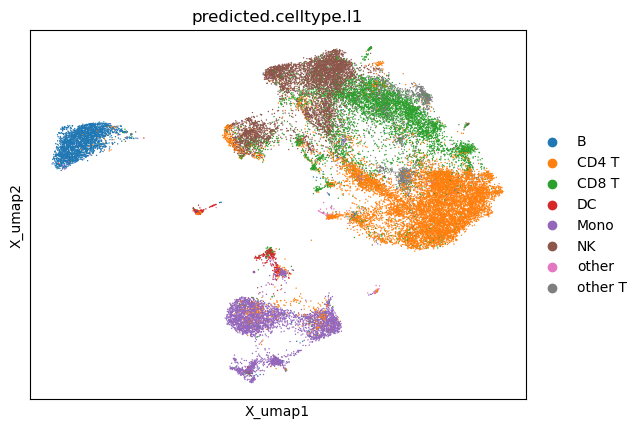

In [136]:
sc.pl.embedding(adata, basis="X_umap", color="predicted.celltype.l1")

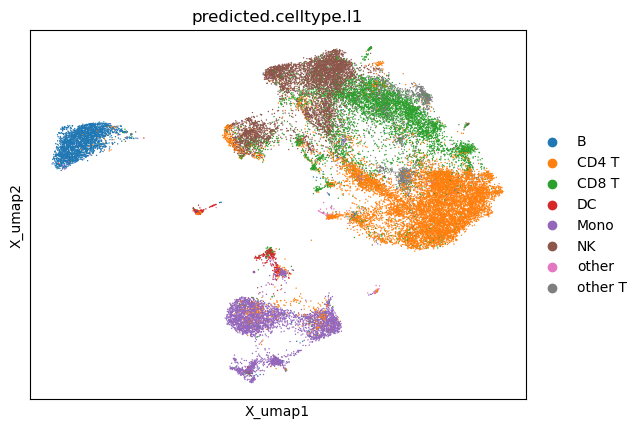

In [136]:
sc.pl.embedding(adata, basis="X_umap", color="predicted.celltype.l1")

In [138]:
adata

AnnData object with n_obs × n_vars = 29930 × 36601
    obs: 'sample', 'patient_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'obs_index', 'soupX_contamination', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Log10GenesPerUMI', 'mitoRatio', 'riboRatio', 'barcode', 'patient_id_prev', 'condition_prev', 'TCR_clones', 'TCR_proportion', 'TCR_CDR3nt', 'TCR_CDR3aa', 'TCR_v_gene', 'TCR_d_gene', 'TCR_j_gene', 'TCR_chain', 'TCR_cellranger_clonotype_id', 'TCR_clonotype_id', 'BCR_clones', 'BCR_proportion', 'BCR_CDR3nt', 'BCR_CDR3aa', 'BCR_v_gene', 'BCR_d_gene', 'BCR_j_gene', 'BCR_chain', 'BCR_cellranger_clonotype_id', 'BCR_clonotype_id', 'repseq', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.sco

In [156]:
trgv = ["TRGV2", "TRGV3", "TRGV4", "TRGV5", "TRGV8", "TRGV9"]
MAIT = ["TRAV1-2"]
          
iNKT = ["TRAV24", "TRBV11-1", "TRBV11-2", "TRBV11-3"]
oth = ["TRAV21", "TRAV38-2DV8", "TRAV22", "TRAV12-2",
       "TRAV19", "TRBV7-2", "TRBV12-3"]
tgenes = trgv + MAIT + iNKT + oth

In [144]:
g = "TRAV1-2"

In [153]:
adata

AnnData object with n_obs × n_vars = 29930 × 36601
    obs: 'sample', 'patient_id', 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'obs_index', 'soupX_contamination', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Log10GenesPerUMI', 'mitoRatio', 'riboRatio', 'barcode', 'patient_id_prev', 'condition_prev', 'TCR_clones', 'TCR_proportion', 'TCR_CDR3nt', 'TCR_CDR3aa', 'TCR_v_gene', 'TCR_d_gene', 'TCR_j_gene', 'TCR_chain', 'TCR_cellranger_clonotype_id', 'TCR_clonotype_id', 'BCR_clones', 'BCR_proportion', 'BCR_CDR3nt', 'BCR_CDR3aa', 'BCR_v_gene', 'BCR_d_gene', 'BCR_j_gene', 'BCR_chain', 'BCR_cellranger_clonotype_id', 'BCR_clonotype_id', 'repseq', 'predicted.celltype.l1.score', 'predicted.celltype.l1', 'predicted.celltype.l2.sco

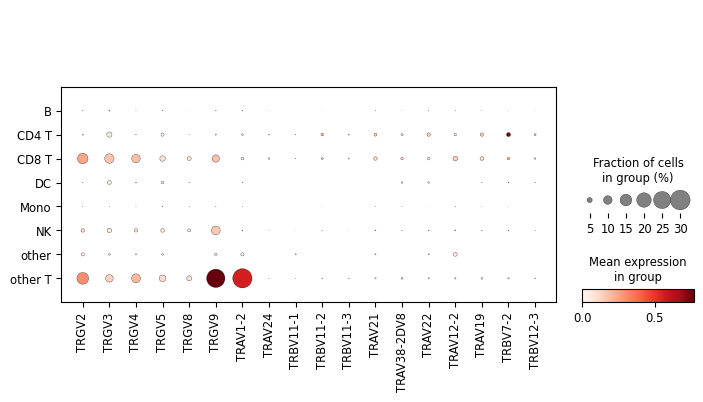

In [210]:
sc.pl.dotplot(adata, layer="soupX_counts", groupby="predicted.celltype.l1", var_names=tgenes, use_raw=False)

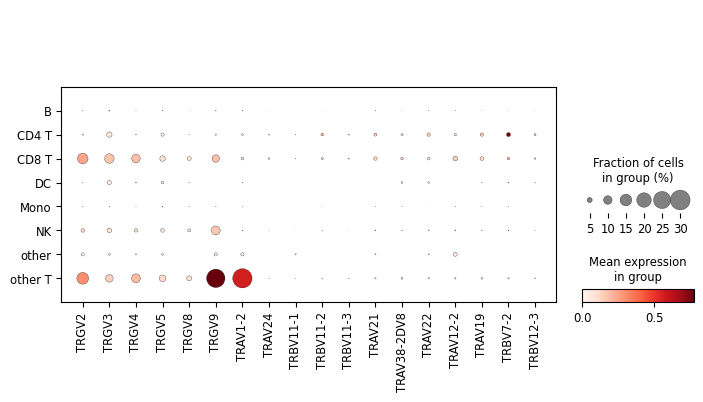

In [211]:
sc.pl.dotplot(adata, layer="counts", groupby="predicted.celltype.l1", var_names=tgenes)

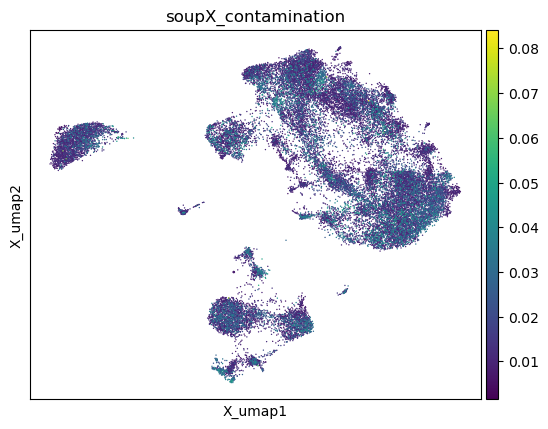

In [170]:
sc.pl.embedding(adata, layer="soupX_counts", basis="X_umap", color="soupX_contamination")

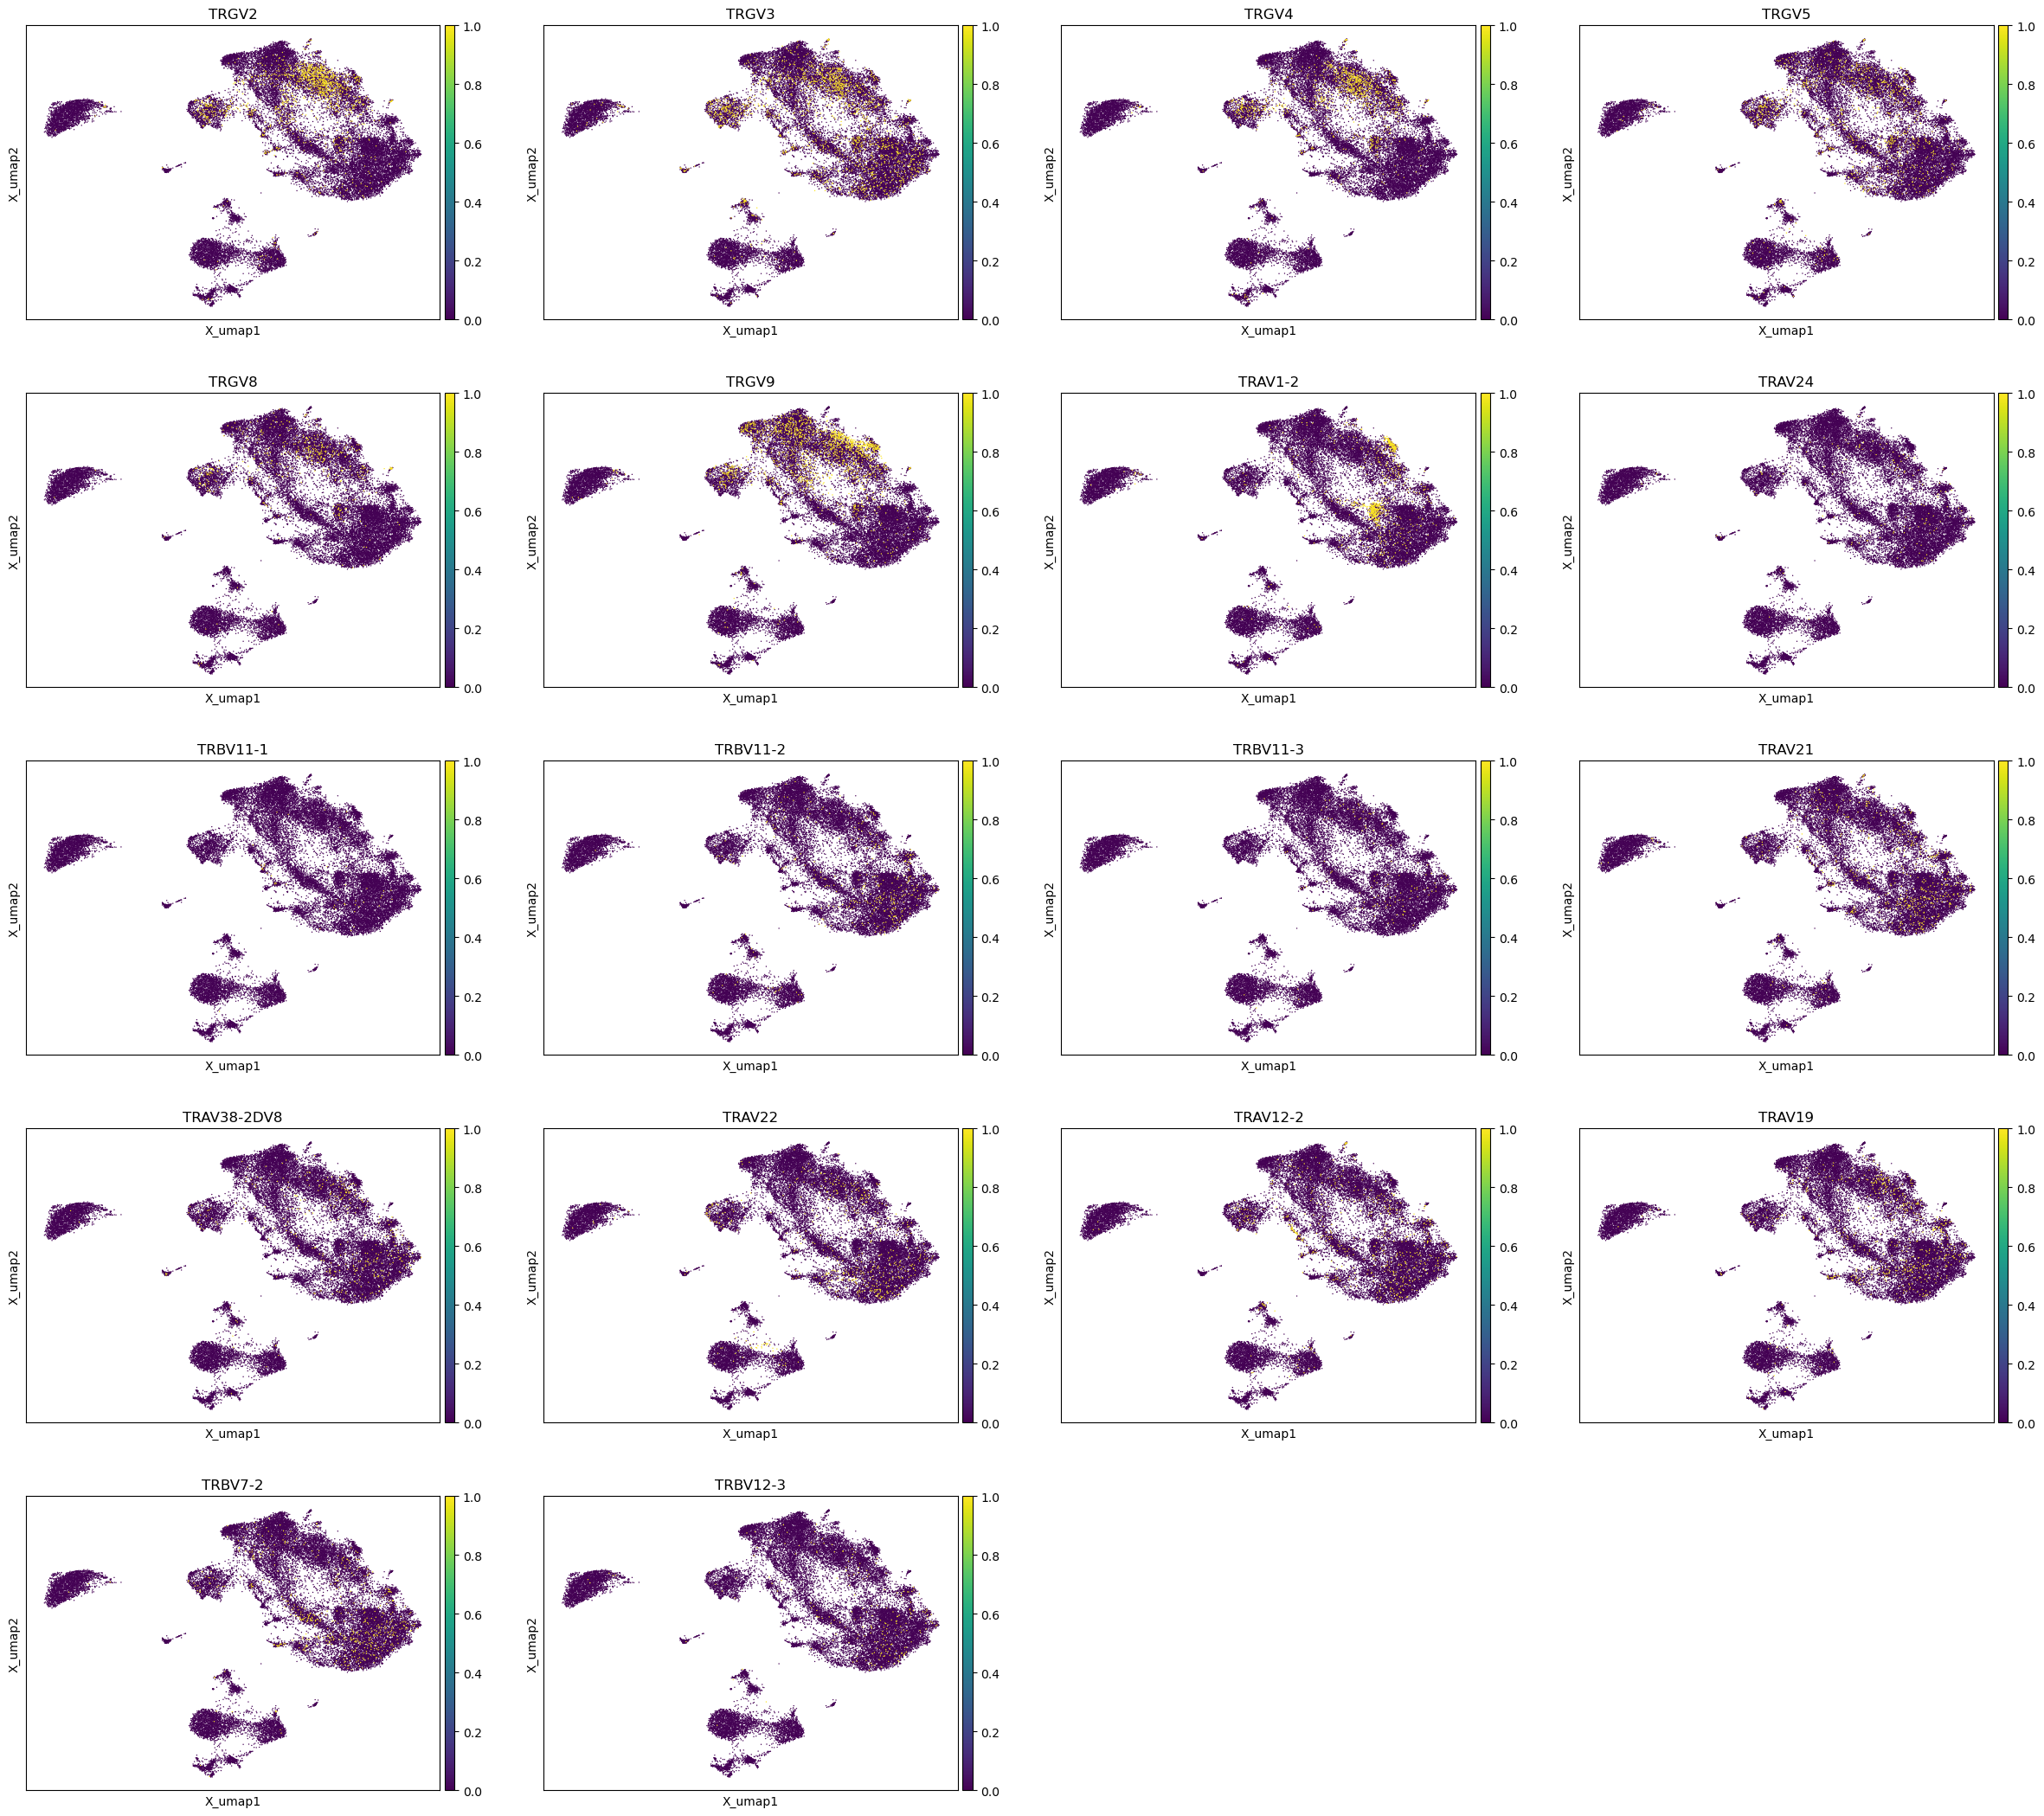

In [159]:
sc.pl.embedding(adata, layer="counts", basis="X_umap", color=tgenes, vmax=1)

In [176]:
diff_df = pd.DataFrame.sparse.from_spmatrix(adata.layers["soupX_counts"] - adata.layers["counts"])

In [197]:
diff_df

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
29925      0      0      0      0      0      0      0      0      0      0   
29926      0      0      0      0      0      0      0      0      0      0   
29927      0      0      0      0      0      0      0      0      0      0   
29928      0      0      0      0      0      0      0      0      0      0   
29929      0      0      0      0      0      0      0      0      0      0   

       ...  36591  36592  36593  36594  36595  36596  36597  36598  36599  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
29925  ...      0      0      0      0      0      0      0      0      0   
29926  ...      0      0      0      0      0      0      0      0      0   
29927  ...      0      0      0      0      0      0      0      0      0   
29928  ...      0      0      0      0      0      0      0      0      0   
29929  ...      0      0      0      0      0      0      0      0      0   

       36600  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
29925      0  
29926      0  
29927      0  
29928      0  
29929      0  

[29930 rows x 36601 columns]

In [190]:
ind = diff_df.sum().sort_values().index

In [111]:
%%R
library(Seurat)
library(scater)
library(scDblFinder)
library(BiocParallel)

Loading required package: SeuratObject
Loading required package: sp

Attaching package: ‘SeuratObject’

The following objects are masked from ‘package:base’:

    intersect, t

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loading required package: matrixStats

Attaching package: ‘MatrixGenerics’

The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts,

RInterpreterError: Failed to parse and evaluate line 'library(Seurat)\nlibrary(scater)\nlibrary(scDblFinder)\nlibrary(BiocParallel)\n'.
R error message: 'Error in library(scDblFinder) : there is no package called ‘scDblFinder’'
R stdout:
Loading required package: SeuratObject
Loading required package: sp

Attaching package: ‘SeuratObject’

The following objects are masked from ‘package:base’:

    intersect, t

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loading required package: matrixStats

Attaching package: ‘MatrixGenerics’

The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
    rowWeightedSds, rowWeightedVars

Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics

Attaching package: ‘BiocGenerics’

The following object is masked from ‘package:SeuratObject’:

    intersect

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min

Loading required package: S4Vectors

Attaching package: ‘S4Vectors’

The following objects are masked from ‘package:Matrix’:

    expand, unname

The following object is masked from ‘package:utils’:

    findMatches

The following objects are masked from ‘package:base’:

    expand.grid, I, unname

Loading required package: IRanges

Attaching package: ‘IRanges’

The following object is masked from ‘package:sp’:

    %over%

Loading required package: GenomeInfoDb
Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Attaching package: ‘Biobase’

The following object is masked from ‘package:MatrixGenerics’:

    rowMedians

The following objects are masked from ‘package:matrixStats’:

    anyMissing, rowMedians


Attaching package: ‘SummarizedExperiment’

The following object is masked from ‘package:Seurat’:

    Assays

The following object is masked from ‘package:SeuratObject’:

    Assays

Loading required package: scuttle
Loading required package: ggplot2
Error in library(scDblFinder) : there is no package called ‘scDblFinder’

In [ ]:
data_mat = adata.X.T